In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments') ,
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Shiva@1234',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/STARNET/OneDrive/Desktop/Ecommerce/archive (4)'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db= mysql.connector.connect(
    host='localhost',
    user='root',
    password='Shiva@1234',
    database='ecommerce'
)
cur=db.cursor()


# 1. List all unique cities where customers are located.



In [6]:
query="select distinct customer_city from customers"

cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.


In [11]:
query="select count(order_id) from orders where year(order_purchase_timestamp)=2017"

cur.execute(query)
data=cur.fetchall()
data

[(45101,)]

# 3. Find the total sales per category.

In [22]:
query="""select products.product_category category,upper(sum(payments.payment_value)) sales
from products join order_items
on products.product_id=order_items.product_id 
join payments
on payments.order_id=order_items.order_id
group by category"""

cur.execute(query)
data=cur.fetchall()
data

[('perfumery', '506738.6598940939'),
 ('Furniture Decoration', '1430176.3917766158'),
 ('telephony', '486882.05071262456'),
 ('bed table bath', '1712553.671003269'),
 ('automotive', '852294.3311252594'),
 ('computer accessories', '1585330.4462582897'),
 ('housewares', '1094758.1302838866'),
 ('babies', '539845.659735024'),
 ('toys', '619037.6894793902'),
 ('Furniture office', '646826.4871485233'),
 ('Cool Stuff', '779698.0000486821'),
 ('HEALTH BEAUTY', '1657373.1193935554'),
 ('pet Shop', '311268.9703014195'),
 ('General Interest Books', '64694.759615421295'),
 ('stationary store', '317440.06965875626'),
 ('Watches present', '1429216.6785924584'),
 ('PCs', '279121.5493659973'),
 ('climatization', '91170.65948677063'),
 ('Construction Tools Construction', '241475.6302587986'),
 ('sport leisure', '1392127.5591495223'),
 ('Bags Accessories', '187151.29038503766'),
 ('electronics', '259857.09967413358'),
 ('Casa Construcao', '136645.29030653834'),
 ('Games consoles', '195480.37912535667')

# 4. Calculate the percentage of orders that were paid in installments.

In [23]:
query="""select sum(case when payment_installments>=1 then 1 else 0 end)/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
data


[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

In [27]:
query="""select customer_state ,count(customer_id)
from  customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
data


[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

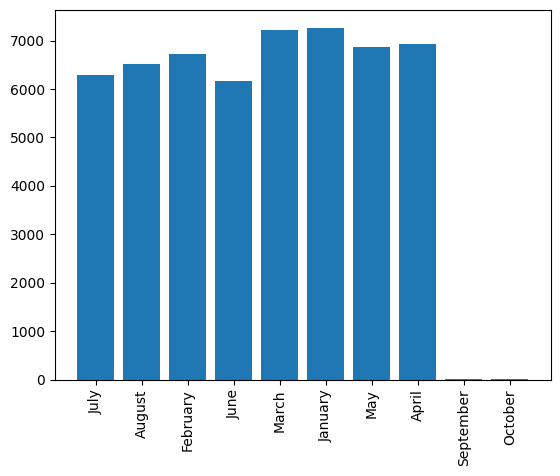

In [55]:
df=pd.DataFrame(data,columns=["state","customer_count"])
df
plt.bar(df['state'],df['customer_count'])
plt.xticks(rotation=90)
plt.show()

#  Calculate the number of orders per month in 2018.

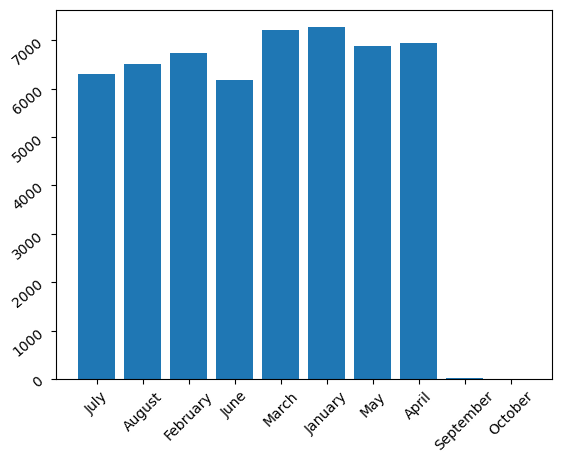

In [53]:
query=""" select monthname(order_purchase_timestamp) months,count(order_id) from orders where year(order_purchase_timestamp)=2018 group by months"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["months","order_count"])
plt.bar(df["months"],df["order_count"])
plt.xticks(rotation=45)
plt.yticks(rotation=40)

plt.show()

#  Find the average number of products per order, grouped by customer city.

In [61]:
query="""with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id)as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers .customer_id=count_per_order.customer_id
group by customers.customer_city;
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data, columns=["customer_city","average_of_order"])
df.head(10)              

,customer_city,average_of_order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# 3. Calculate the percentage of total revenue contributed by each product category.

In [77]:
query="""select products.product_category category,upper(sum(payments.payment_value))/(select sum(payment_value) from payments)*100 sales
from products join order_items
on products.product_id=order_items.product_id 
join payments
on payments.order_id=order_items.order_id
group by category order by sales desc"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['category','percentage distribution'])
df

,category,percentage distribution
0,bed table bath,10.697529
1,HEALTH BEAUTY,10.352841
2,computer accessories,9.902824
3,Furniture Decoration,8.933649
4,Watches present,8.927654
...,...,...
69,PC Gamer,0.013583
70,House Comfort 2,0.010685
71,cds music dvds,0.007492
72,Fashion Children's Clothing,0.004908


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [78]:
query="""select (products.product_category), count(order_items.order_id) ,round(avg(order_items.price),2) from products join order_items on products.product_id=order_items.product_id
group by products.product_category"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['category','count','price'])
df

,category,count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


  # 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
query="""select *,dense_rank() over(order by revenue desc) as rn from
(select (order_items.seller_id),sum(payments.payment_value) as revenue from order_items join payments on order_items.order_id=payments.order_id
group by order_items.seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["seller_id","price","rank"])
df
df.head(10)
sns.barplot(x="seller_id",y="rank",data=df)
plt.show

 # 1. Calculate the moving average of order values for each customer over their order history.

In [6]:
query=""" 
select customer_id,order_purchase_timestamp,payment,avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row )as movavg from
(select (orders.customer_id),(orders.order_purchase_timestamp),(payments.payment_value) as payment
from orders join payments on orders.order_id=payments.order_id) as a
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment","movavg"])
df

,customer_id,order_purchase_timestamp,payment,movavg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# 2. Calculate the cumulative sales per month for each year.

In [ ]:
query="""select years ,months,payment,sum(payment) over(order by years, months) cumulative_sales from (select (orders.order_purchase_time) as years ,
(orders.order_purchase_time) as months,
sum(payments.payment_value) as payment
from orders join payments on orders.order_id=payments.order_id group by years,months order by years,months) as a"""
cur.execute(query)
data=cur.fetchall()
data